# Platt Monkey Dataset

## 1. Read in matlab files

Note: Data format after Matlab 2006a is stored as HDF5 now, thus scipy.io doesn't support the format of HDF5 anymore. We have to use h5py to decode the data.

In [5]:
from __future__ import division

import numpy as np
import pandas as pd
import daytime

import matplotlib.pyplot as plt

%matplotlib inline

In [132]:
import h5py

# for Matlab datafile v7.3
datmat = h5py.File('spikes1.mat', 'r')['AllData']

In [133]:
datmat.keys()

[u'DayNum',
 u'ImageNames',
 u'ImageOn_ts',
 u'Spikes_cell_num',
 u'Spikes_ts',
 u'cell_num',
 u'is_first_image',
 u'is_rewarded_image']

### Alert Alert!! (Freezes your computer ~5 minutes) 

In [174]:
# get dates from datmat and store them in 'date'
dates = []
dateref = datmat.values()[0][0]

for idx in range(dateref.shape[0]):
    obj = datmat[dateref[idx]]
    dates.append(''.join(chr(i) for i in obj[:]))

In [183]:
type(dates[0])

str

In [177]:
# get image names from datmat and store them in 'imnames'
imnames = []
imref = datmat.values()[1][0]

for idx in range(imref.shape[0]):
    obj = datmat[imref[idx]]
    imnames.append(''.join(chr(i) for i in obj[:]))

In [331]:
imnames

['lum_scr_toothbrush.jpg',
 'lum_broome18_white.jpg',
 'lum_lei.jpg',
 'lum_neutral010.jpg',
 'lum_peri24_white.jpg',
 'lum_peri35_white.jpg',
 'lum_scr_threat013.jpg',
 'lum_peri26_white.jpg',
 'lum_mf0912_1100_00f.jpg',
 'lum_mf0910_2201_30l.jpg',
 'lum_scr_averted043.jpg',
 'lum_tape.jpg',
 'lum_scr_mitten02a.jpg',
 'lum_mm0906_1100_90l.jpg',
 'lum_nailpolish02a.jpg',
 'lum_mm0905_1110_60r.jpg',
 'lum_sherry02_white.jpg',
 'lum_plant11.jpg',
 'lum_pitcher02a.jpg',
 'lum_screwdriver07.jpg',
 'lum_cajal05_white.jpg',
 'lum_pillow02a.jpg',
 'lum_mf0910_2201_ne.jpg',
 'lum_scr_peri04_white.jpg',
 'lum_scr_mf0914_2200_ne.jpg',
 'lum_scr_sunglasses03b.jpg',
 'lum_huxley03_white.jpg',
 'lum_huxley19_white.jpg',
 'lum_snake.jpg',
 'lum_dart02_white.jpg',
 'lum_ovenmitt.jpg',
 'lum_scr_ernie03_white.jpg',
 'lum_scr_mm0902_1100_30r.jpg',
 'lum_scr_mm0903_1100_90r.jpg',
 'lum_scr_ernie05_white.jpg',
 'lum_sherry11_white.jpg',
 'lum_neutral025.jpg',
 'lum_peri10_white.jpg',
 'lum_scr_mf0914_220

In [336]:
imnames1

array(['lum_IMG_4142_trimmed.jpg', 'lum_IMG_4145_trimmed.jpg',
       'lum_IMG_4146_trimmed.jpg', ..., 'lum_tweezers02b.jpg',
       'lum_umbrella02a.jpg', 'lum_yarn.jpg'], 
      dtype='|S30')

In [180]:
# ge the mapping from trial image names and stimulus numbers
# 'imnames' is a list of image names (1114,)
# 'imidx' is a list of image indices to 'trials' dataset (690564,)
imnames1, imidx = np.unique(imnames, return_inverse=True)

### ... Continue

In [425]:
# get variables from fields related to spikes
fields = [i for i in range(len(datmat.keys())) if 'Spikes' in datmat.keys()[i]]

spktrials = np.c_[[datmat.values()[i][0] for i in fields]].T
spktrials = pd.DataFrame(spktrials, columns=['unit', 'spike'])
spktrials.unit = spktrials.unit.astype(int)

In [230]:
spktrials.shape

(3954792, 2)

In [237]:
# # get variables from fields related to trials
# fields = [i for i in range(1, len(datmat.keys())) if 'Spikes' not in datmat.keys()[i]]

# trials = np.c_[[datmat.values()[i][0] for i in fields]].T
# trials = np.c_[imidx, trials]
# trials = pd.DataFrame(trials, columns=['stim', 'stimon', 'unit', 'isfirst', 'isrewarded'])


In [426]:
# get variables from fields related to trials
fields = [i for i in range(2, len(datmat.keys())) if 'Spikes' not in datmat.keys()[i]]

trials = np.c_[[datmat.values()[i][0] for i in fields]].T
trials = np.c_[dates, imidx, trials]
trials = pd.DataFrame(trials, columns=['date', 'stim', 'stimon', 'unit', 'isfirst', 'isrewarded'])


In [427]:
imidx.shape

(690564,)

In [428]:
# Convert element types (will there be more efficient way to do this?)
trials.stim = trials.stim.astype(int)
trials.stimon = trials.stimon.astype(float)
trials.unit = trials.unit.astype(float)
trials.unit = trials.unit.astype(int)
trials.isfirst = trials.isfirst.astype(float)
trials.isfirst = trials.isfirst.astype(int)
trials.isrewarded = trials.isrewarded.astype(float)
trials.isrewarded = trials.isrewarded.astype(int)

In [429]:
trials

,date,stim,stimon,unit,isfirst,isrewarded
0,2015_12_03,1050,1.344577e+01,1001,1,0
1,2015_12_03,76,1.432730e+01,1001,0,0
2,2015_12_03,173,1.499175e+01,1001,0,1
3,2015_12_03,364,1.810865e+01,1001,1,0
4,2015_12_03,438,1.899175e+01,1001,0,0
5,2015_12_03,449,1.971098e+01,1001,0,1
6,2015_12_03,1044,2.331008e+01,1001,1,0
7,2015_12_03,440,2.414293e+01,1001,0,0
8,2015_12_03,239,2.487500e+01,1001,0,1
9,2015_12_03,220,2.750900e+01,1001,1,0


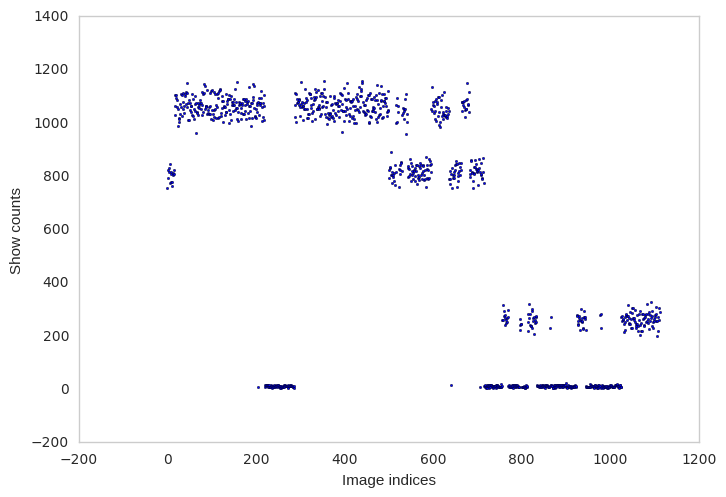

In [240]:
# The number of show times for each image
plt.scatter(trials.groupby(by=['stim']).count().index, trials.groupby(by=['stim']).count()['stimon'], s=3)
plt.xlabel('Image indices')
plt.ylabel('Show counts')

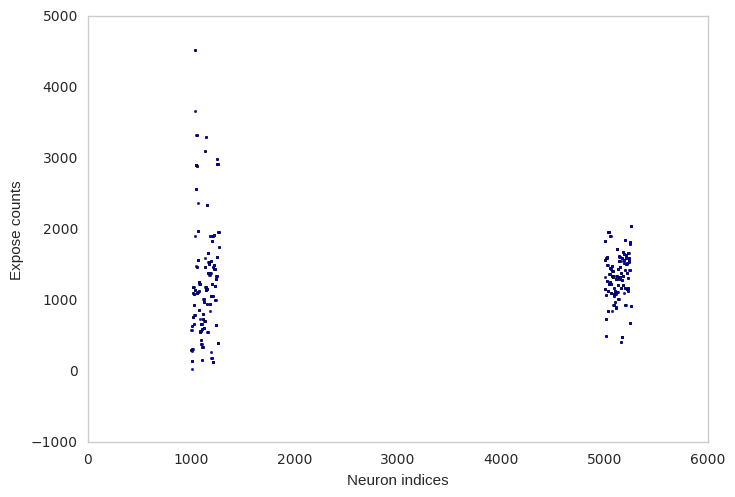

In [220]:
# Number of expose times for different neurons
plt.scatter(trials.groupby(by=['unit']).count().index, trials.groupby(by=['unit']).count()['stim'], s=3)
plt.xlabel('Neuron indices')
plt.ylabel('Expose counts')

In [313]:
group = trials.groupby(by=['stim', 'unit']).count()['stimon']
unstackgrp = group.unstack(level=0)

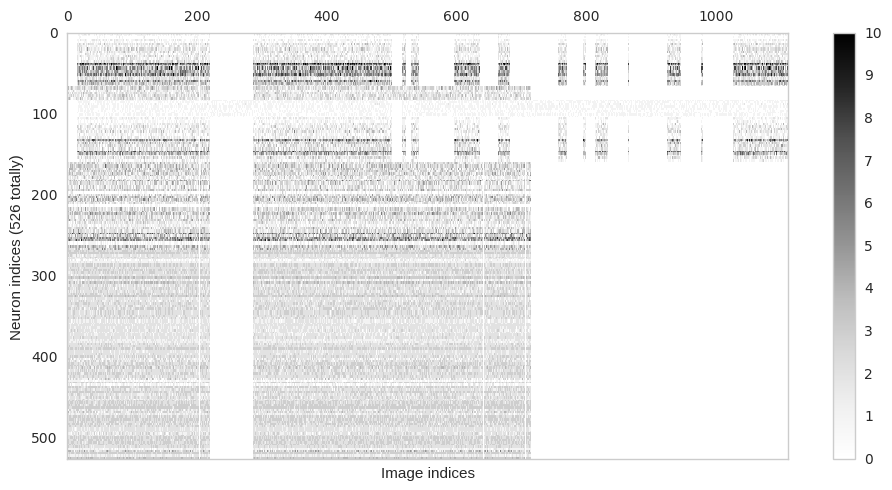

In [314]:
import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})

plt.figure(figsize=(20, 10))
plt.matshow(unstackgrp, aspect='auto', vmin=0, vmax=10)
plt.colorbar()
plt.xlabel('Image indices')
plt.ylabel('Neuron indices (526 totally)')

## 1.2. Add the column of spike counts

### Now take a look at the intervals between trials to determine the stim-on period

In [315]:
stimdiff = trials.stimon.diff().values
np.min(stimdiff[stimdiff > 0])

0.44059999999999988

(0, 5)

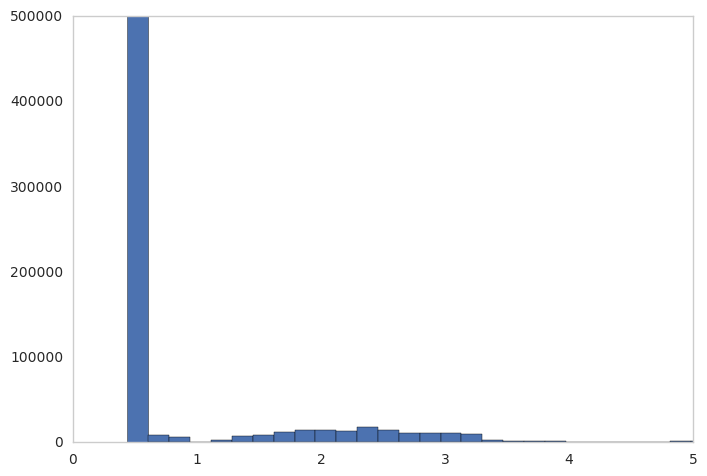

In [110]:
# histogram for same-day time intervals. Min: 0.44059999999999988, Max: 4294042.3105500005
plt.hist(stimdiff[(stimdiff > 0) & (stimdiff < 4e5)], bins=1000)
plt.xlim(0, 5)

### ... Finally decided to use a stim-on period of 400ms for all stimuli

In [243]:
# Find the places in spktrials when 'unit' changes
# spktrials['unitdiff'] = spktrials.unit.diff()
spkdiff = spktrials[spktrials.unit.diff() != 0].index.values
spkdiff = np.append(spkdiff, spktrials.shape[0])

In [244]:
# compute trial diff indices
trialdiff = trials[trials.unit.diff() != 0].index.values
trialdiff = np.append(trialdiff, trials.shape[0])

### Alert Alert!! (Freezes your computer ~10 minutes)

In [433]:
# get a list of spike counts 
# Time: takes about 10 minutes to run
count = []
countpre = []
for uchg in range(spkdiff.shape[0] - 1):
    tempdf = spktrials.iloc[spkdiff[uchg] : spkdiff[uchg + 1]]
    for i in range(trialdiff[uchg], trialdiff[uchg + 1]):
        countpre.append(np.sum((tempdf.spike > trials.stimon[i] - .1) 
                            & (tempdf.spike < trials.stimon[i])))
        count.append(np.sum((tempdf.spike > trials.stimon[i]) 
                            & (tempdf.spike < trials.stimon[i] + .4)))
        #trials['count'][trialdiff[0] + i] = 
        #np.sum((tempdf.spike > trials.stimon[i]) & (tempdf.spike < trials.stimon[i] + .4))

trials['count'] = count

In [435]:
#trials['count'] = count
countpre

[0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 2,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [421]:
countpre

[0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 4,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [440]:
dfpre = pd.DataFrame(trials['stim', ''])
dfpre['baseline'] = countpre

In [442]:
dfpre

,stim,baseline
0,1050,0
1,76,0
2,173,0
3,364,0
4,438,0
5,449,3
6,1044,0
7,440,0
8,239,0
9,220,0


### ... Now the column of 'count' is added to trials

In [443]:
trials

,date,stim,stimon,unit,isfirst,isrewarded,count
0,2015_12_03,1050,1.344577e+01,1001,1,0,5
1,2015_12_03,76,1.432730e+01,1001,0,0,3
2,2015_12_03,173,1.499175e+01,1001,0,1,0
3,2015_12_03,364,1.810865e+01,1001,1,0,2
4,2015_12_03,438,1.899175e+01,1001,0,0,12
5,2015_12_03,449,1.971098e+01,1001,0,1,11
6,2015_12_03,1044,2.331008e+01,1001,1,0,3
7,2015_12_03,440,2.414293e+01,1001,0,0,10
8,2015_12_03,239,2.487500e+01,1001,0,1,0
9,2015_12_03,220,2.750900e+01,1001,1,0,5


In [319]:
# Take a look at the average spike counts
print "average counts: {}".format(np.mean(trials['count']))
# plt.hist(trials['count'].values, bins = 100)
print "average counts is first: {}".format(np.mean(trials[trials['isfirst'] == 1]['count']))
print "average counts is rewarded: {}".format(np.mean(trials[trials['isrewarded'] == 1]['count']))

average counts: 2.24998117481
average counts is first: 2.14026467886
average counts is rewarded: 2.12916137789


### 1.3. Add 'trial' variable to trials dataframe

In [444]:
trials = trials.sort_values(by=['date', 'stimon', 'unit'])
trials = trials.reset_index(drop=True)
# insert trial index to dataframe
tridiff = trials.stimon.diff()
triidx = []
idx = 0
for i in range(len(tridiff)):
    if tridiff.values[i] != 0:
        idx += 1
    triidx.append(idx)
    
trials['trial'] = triidx
# sum(tridiff.values != 0)

In [445]:
trials

,date,stim,stimon,unit,isfirst,isrewarded,count,trial
0,2015_06_10,1063,9.214600e+00,1085,1,0,11,1
1,2015_06_10,666,1.002500e+01,1085,0,0,7,2
2,2015_06_10,374,1.075820e+01,1085,0,1,10,3
3,2015_06_10,962,1.285988e+01,1085,1,0,5,4
4,2015_06_10,790,1.359150e+01,1085,0,0,6,5
5,2015_06_10,363,1.424212e+01,1085,0,1,7,6
6,2015_06_10,634,1.630840e+01,1085,1,0,0,7
7,2015_06_10,336,1.692530e+01,1085,0,0,12,8
8,2015_06_10,898,1.774190e+01,1085,0,1,5,9
9,2015_06_10,351,2.052488e+01,1085,1,0,6,10


## 2. Determine which stimuli will be excluded from the dataset

In [446]:
stimcount = trials.groupby(by=['stim']).count()['stimon']
dropidx = stimcount[stimcount < 100].index
# We found 314 stimuli that have been exposed to any neuron less than 100 times - most of them are 5~20 times.

In [322]:
dropidx

Int64Index([ 204,  220,  221,  222,  223,  224,  225,  226,  227,  228,
            ...
            1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024],
           dtype='int64', name=u'stim', length=314)

In [447]:
trials = trials[~trials['stim'].isin(dropidx)].reset_index(drop=True)

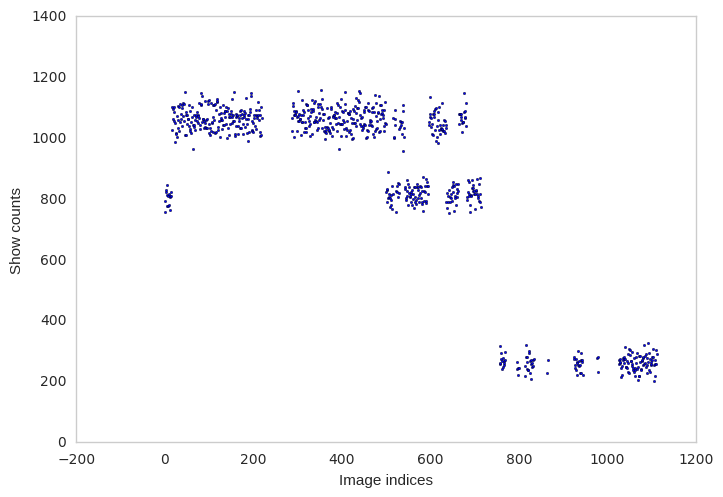

In [448]:
# The number of show times for each image
plt.scatter(trials.groupby(by=['stim']).count().index, trials.groupby(by=['stim']).count()['stimon'], s=3)
plt.xlabel('Image indices')
plt.ylabel('Show counts')

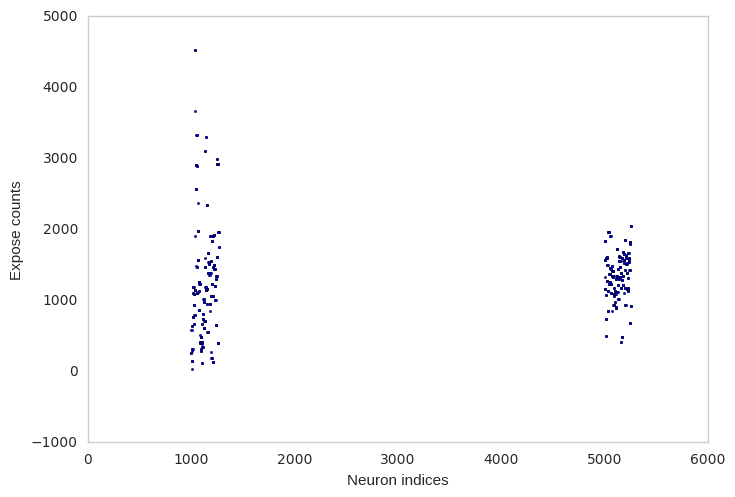

In [449]:
# Number of expose times for different neurons
plt.scatter(trials.groupby(by=['unit']).count().index, trials.groupby(by=['unit']).count()['stim'], s=3)
plt.xlabel('Neuron indices')
plt.ylabel('Expose counts')

In [450]:
group = trials.groupby(by=['stim', 'unit']).count()['stimon']
unstackgrp = group.unstack(level=0)

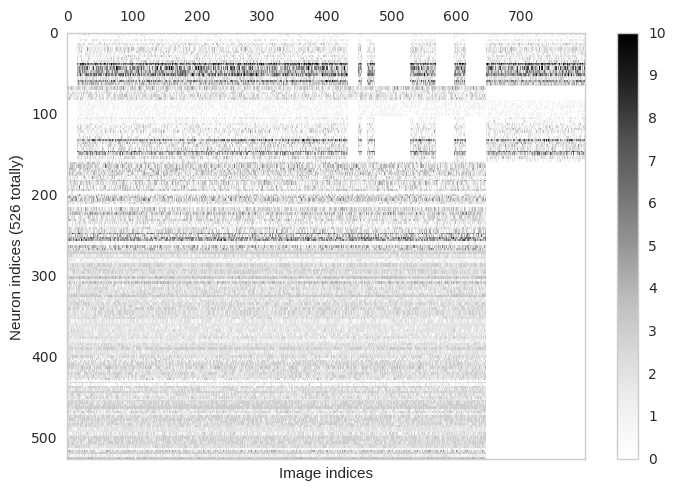

In [451]:
import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})

plt.figure(figsize=(20, 10))
plt.matshow(unstackgrp, aspect='auto', vmin=0, vmax=10)
plt.colorbar()
plt.xlabel('Image indices')
plt.ylabel('Neuron indices (526 totally)')

In [261]:
unstackgrp

stim,0,1,2,3,4,5,6,7,8,9,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111
unit,,,,,,,,,,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,2.0,2.0,1.0,1.0,NaN,1.0
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,2.0,2.0,1.0,1.0,NaN,1.0
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([  7.93570000e+04,   0.00000000e+00,   1.23296000e+05,
          0.00000000e+00,   7.30430000e+04,   0.00000000e+00,
          1.62520000e+04,   0.00000000e+00,   6.03900000e+03,
          0.00000000e+00,   3.91400000e+03,   0.00000000e+00,
          1.57100000e+03,   0.00000000e+00,   0.00000000e+00,
          9.72000000e+02,   0.00000000e+00,   2.45000000e+02,
          0.00000000e+00,   1.88000000e+02,   0.00000000e+00,
          4.30000000e+01,   0.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00]),
 array([  1.        ,   1.46666667,   1.93333333,   2.4       ,
          2.86666667,   3.33333333,   3.8       ,   4.26666667,
          4.73333333,   5.2       ,   5.66666667,   6.13333333,
          6.6       ,   7.06666667,   7.53333333,   8.        ,
          8.46666667,   8.93333333,   9.4       ,   9.86666667,
         10.33333333,  10.8       ,  11.26666667,  11.7333

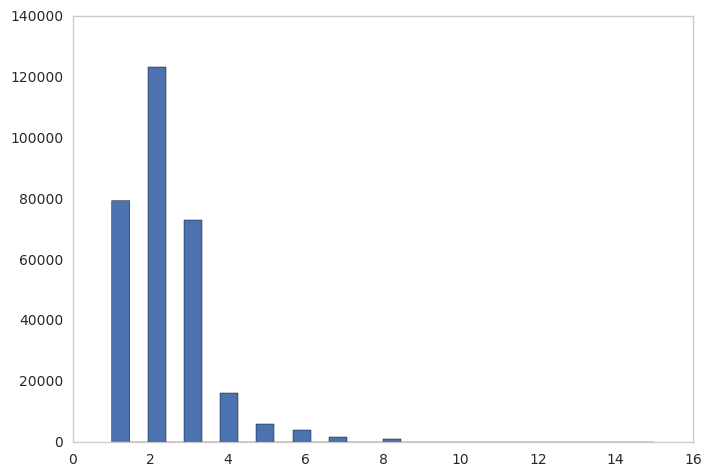

In [96]:
plt.hist(unstackgrp.values[~np.isnan(unstackgrp.values)], bins=30)

In [97]:
np.nanmean(unstackgrp.values)

2.2538516531446149

## 3. Sort and output to .csv file

In [452]:
trials['time'] = np.unique(trials.stim, return_inverse=True)[1]
trials['trial'] = np.unique(trials.trial, return_inverse=True)[1]
#trials['time'] = trials['stim']

In [453]:
# only keep the columns that are useful to feed into model
aa = trials.drop(['date', 'stimon'], 1).sort_values(by=['stim', 'unit'])
aa.to_csv('data/prepared_data.csv', index=False)

In [454]:
#trials['utime'] = trials['stim']
trials.drop(['date', 'stimon'], 1).sort_values(by=['stim', 'unit'])

,stim,unit,isfirst,isrewarded,count,trial,time
183263,0,1068,0,0,4,57277,0
183264,0,1069,0,0,1,57277,0
183265,0,1070,0,0,6,57277,0
183266,0,1071,0,0,0,57277,0
192934,0,1072,1,0,3,60250,0
192935,0,1073,1,0,1,60250,0
192936,0,1074,1,0,3,60250,0
195010,0,1075,0,0,2,61200,0
195011,0,1076,0,0,1,61200,0
210681,0,1077,0,0,1,66732,0


In [330]:
test = [754, 753, 784, 733, 776, 755, 792, 675, 714, 723, 697, 708]
testimg = np.unique(trials[trials['time'].isin(test)].stim)

In [340]:
test - 1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [416]:
spktrials

,unit,spike
0,1001,3.744000e-01
1,1001,5.884000e-01
2,1001,5.999250e-01
3,1001,1.039725e+00
4,1001,1.045375e+00
5,1001,1.137725e+00
6,1001,1.218300e+00
7,1001,1.327325e+00
8,1001,1.824550e+00
9,1001,2.012550e+00


## 2. Read image categories

In [400]:
# Read image categories
iminfo = pd.read_table("data/stimulus_characteristics.txt")

In [401]:
# exclude the images that were not presented in trials
# imnames is a list of image names presented in trials
iminfo = iminfo[(iminfo.image_file_name.isin(imnames))]
iminfo = iminfo.sort_values(by=['image_file_name']).reset_index(drop=True)

In [402]:
# Large categories are 'human' (342), 'monkey face' (396), 'object' (224), 'perinea' (150)
catsum = iminfo.sum(axis=0)
catsum

Human?               342
Monkey face?         396
Object?              224
Perinea?             150
direct gaze?         104
averted gaze?        262
face oriented L      132
face oriented R      112
face straight        122
threat?                8
scrambled?           557
Male Perinea?         32
Female Perinea?      118
Cayo                 176
Colony               220
head visible          12
tail visible          63
num legs             147
side view             21
frontal view          54
partially occuded     30
dtype: int64

In [347]:
iminfo.index.isin(trials.stim))

798

In [392]:
?iminfo.sort_values

In [408]:
iminfo798 = iminfo[iminfo.index.isin(trials.stim)]

imgmap = iminfo798.reset_index(drop=True).sort_values(
    by=['Human?', 'Monkey face?', 'Object?', 'Perinea?', 'direct gaze?', 'averted gaze?', 
        'face oriented L', 'face oriented R', 'face straight', 'Male Perinea?', 'Female Perinea?']).index.values

In [415]:
iminfo798.reset_index(drop=True).sort_values(
    by=['Human?', 'Monkey face?', 'Object?', 'Perinea?', 'direct gaze?', 'averted gaze?', 
        'face oriented L', 'face oriented R', 'face straight', 'Male Perinea?', 'Female Perinea?']).to_csv('iminfo798.csv')

In [409]:
imgmap

array([347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372,
       373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
       386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398,
       399, 400, 401, 402, 403, 404, 405, 687, 688, 689, 690, 691, 692,
       693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705,
       706, 707,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447,  19,  51,  52,  53,  54,
        55,  56,  57,  58,  79,  80,  81,  82, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 123, 124, 125, 145, 146, 147, 148, 149,
       150, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 240, 285,
       286, 287, 288, 289, 290, 337, 338, 339, 340, 341, 342, 343, 344,
       345, 346, 406, 407, 408, 409, 410, 411, 412, 413, 414, 41

In [410]:
np.save("imgmap", imgmap)

In [370]:
iminfo[iminfo.index.isin(trials.stim)]['Perinea?'].sum()

112

In [337]:
testimg

array([ 824,  934,  977, 1028, 1037, 1047, 1067, 1068, 1069, 1090, 1098,
       1106])

In [407]:
iminfo798.sort_values(
    by=['Human?', 'Monkey face?', 'Object?', 'Perinea?', 'direct gaze?', 'averted gaze?', 'face oriented L', 'face oriented R', 'face straight', 'Male Perinea?', 'Female Perinea?']).to_csv('test.csv')

In [394]:
iminfo798.reset_index(drop=True).sort_values(
    by=['Human?', 'Monkey face?', 'Object?', 'Perinea?', 'scrambled?'])#.to_csv('iminfo798.csv')

,image_file_name,monkey_name,Human?,Monkey face?,Object?,Perinea?,direct gaze?,averted gaze?,face oriented L,face oriented R,...,Male Perinea?,Female Perinea?,Cayo,Colony,head visible,tail visible,num legs,side view,frontal view,partially occuded
181,lum_mf0902_1111_90r.jpg,NaN,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
182,lum_mf0904_1100_60l.jpg,NaN,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
183,lum_mf0904_1100_90l.jpg,NaN,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
184,lum_mf0904_1100_90r.jpg,NaN,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
185,lum_mf0904_2201_45l.jpg,NaN,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
186,lum_mf0906_1100_60r.jpg,NaN,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
187,lum_mf0907_1100_30r.jpg,NaN,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
188,lum_mf0907_1100_45l.jpg,NaN,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
189,lum_mf0907_1100_60l.jpg,NaN,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
190,lum_mf0907_1100_an.jpg,NaN,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
iminfo798.sum(axis=0)

Human?               174
Monkey face?         333
Object?              179
Perinea?             112
direct gaze?         107
averted gaze?        200
face oriented L      101
face oriented R       90
face straight        107
threat?                8
scrambled?           311
Male Perinea?         32
Female Perinea?       80
Cayo                 132
Colony               201
head visible          12
tail visible          63
num legs             147
side view             21
frontal view          54
partially occuded     30
dtype: int64

In [380]:
iminfo798[iminfo798['Human?'] == 1].sum(axis=0)

image_file_name      lum_mf0902_1111_90r.jpglum_mf0904_1100_60l.jpg...
monkey_name                                                        NaN
Human?                                                             174
Monkey face?                                                         0
Object?                                                              0
Perinea?                                                             0
direct gaze?                                                        14
averted gaze?                                                       97
face oriented L                                                     51
face oriented R                                                     34
face straight                                                       18
threat?                                                              0
scrambled?                                                          71
Male Perinea?                                                        0
Female

In [381]:
iminfo798[iminfo798['Monkey face?'] == 1].sum(axis=0)

Human?                 0
Monkey face?         333
Object?                0
Perinea?               0
direct gaze?          93
averted gaze?        103
face oriented L       50
face oriented R       56
face straight         89
threat?                8
scrambled?           136
Male Perinea?          0
Female Perinea?        0
Cayo                 132
Colony               201
head visible           0
tail visible           0
num legs               0
side view              0
frontal view           0
partially occuded      0
dtype: int64

In [382]:
iminfo798[iminfo798['Object?'] == 1].sum(axis=0)

image_file_name      lum_apple.jpglum_balloon.jpglum_baseballcap.jp...
monkey_name                                                        NaN
Human?                                                               0
Monkey face?                                                         0
Object?                                                            179
Perinea?                                                             0
direct gaze?                                                         0
averted gaze?                                                        0
face oriented L                                                      0
face oriented R                                                      0
face straight                                                        0
threat?                                                              0
scrambled?                                                          67
Male Perinea?                                                        0
Female

In [383]:
iminfo798[iminfo798['Perinea?'] == 1].sum(axis=0)

image_file_name      lum_IMG_4142_trimmed.jpglum_IMG_4145_trimmed.j...
monkey_name                                                        NaN
Human?                                                               0
Monkey face?                                                         0
Object?                                                              0
Perinea?                                                           112
direct gaze?                                                         0
averted gaze?                                                        0
face oriented L                                                      0
face oriented R                                                      0
face straight                                                        0
threat?                                                              0
scrambled?                                                          37
Male Perinea?                                                       32
Female